<a href="https://colab.research.google.com/github/alexchen2027-spec/chinese-poetry/blob/master/human_trafficking_data_chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting ready

## Install all required packages

In [ ]:
!pip install plotly
!pip install matplotlib
!pip install altair
!pip install geoplot
!pip install seaborn
!pip install polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 118.9 MB/s eta 0:00:00


## Import all packages

In [ ]:
import matplotlib.pyplot as plt
import altair as alt
import geoplot
import polars as pl

## Use Seaborn and Polars to load csv data and check to see if visualization generates graph

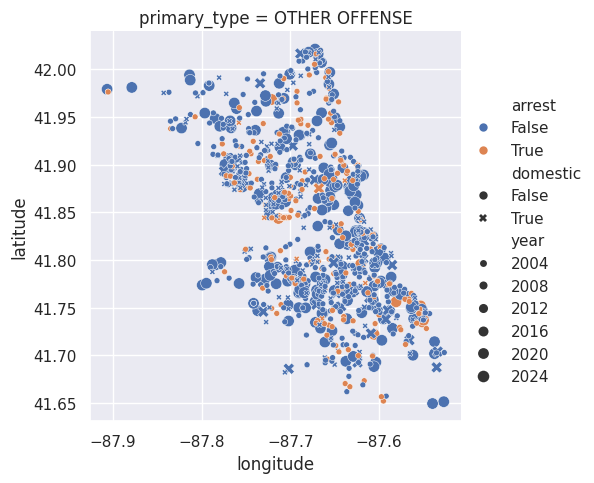

In [ ]:
import seaborn as sns
# Apply the default theme
sns.set_theme()

# Set Data Path
data_path = '/content/drive/MyDrive/🛠 Projects/NU Junior Year/comm368/Crimes - 2001 to Present.csv'

# Load an example dataset
tips = sns.load_dataset("tips")

# Load Chicago Crimes dataset
chicago_crimes = pl.read_csv(data_path)

# Visualize Chicago Crimes
sns.relplot(
    data=chicago_crimes,
    x="longitude", y="latitude", col="primary_type",
    hue="arrest", style="domestic", size="year",
)

# Clean data using SQL (duckdb)

## Load into duckdb

install duckdb and motherduck

In [60]:
!pip install duckdb
!pip install motherduck

setup sql connections

In [61]:
import sqlite3
import duckdb
import motherduck

import data into duckdb

In [88]:
import duckdb

"""
Input: data_csv
Output: tbl_a in duckdb sql format
"""

data_csv = '/content/drive/MyDrive/🛠 Projects/NU Junior Year/comm368/Crimes - 2001 to Present.csv'

# Create table called tbl_a
duckdb.sql(f"""
    CREATE TABLE tbl_a AS
    SELECT * FROM read_csv_auto('{data_csv}')
""")

# Query and print first 5 rows of tbl_a tp cjecl
result = duckdb.sql("""
    SELECT * FROM tbl_a
    LIMIT 5
""").fetchdf()

print(result)


CatalogException: Catalog Error: Table with name "tbl_a" already exists!

## Describe data in duckdb

In [82]:
# Describe data
duckdb.sql("""
    DESCRIBE tbl_a
""").fetchdf()

,column_name,column_type,null,key,default,extra
0,id,BIGINT,YES,None,None,None
1,case_number,VARCHAR,YES,None,None,None
2,date,TIMESTAMP,YES,None,None,None
3,block,VARCHAR,YES,None,None,None
4,iucr,BIGINT,YES,None,None,None
5,primary_type,VARCHAR,YES,None,None,None
6,description,VARCHAR,YES,None,None,None
7,location_description,VARCHAR,YES,None,None,None
8,arrest,BOOLEAN,YES,None,None,None
9,domestic,BOOLEAN,YES,None,None,None


## Districts and counts per district

In [86]:
duckdb.sql(f"""
    SELECT district, COUNT(*) as Count,
    FROM tbl_a
    GROUP BY district, ward
    ORDER BY Count DESC
""")

┌──────────┬───────┐
│ district │ Count │
│ varchar  │ int64 │
├──────────┼───────┤
│ 008      │    70 │
│ 002      │    65 │
│ 010      │    47 │
│ 025      │    45 │
│ 009      │    40 │
│ 015      │    39 │
│ 007      │    39 │
│ 006      │    35 │
│ 011      │    35 │
│ 004      │    33 │
│  ·       │     · │
│  ·       │     · │
│  ·       │     · │
│ 017      │     1 │
│ 009      │     1 │
│ 005      │     1 │
│ 024      │     1 │
│ 014      │     1 │
│ 025      │     1 │
│ 005      │     1 │
│ 025      │     1 │
│ 005      │     1 │
│ 011      │     1 │
├──────────┴───────┤
│     108 rows     │
│    (20 shown)    │
└──────────────────┘

# Create chart using Seaborn

import all modules needed

In [ ]:
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt

set up dataframes

In [99]:
df = duckdb.sql("""
  SELECT district, COUNT(*) as count_per_district
  FROM tbl_a,
  GROUP BY district,
  ORDER BY count_per_district DESC
""").df()

create table

Text(0, 0.5, 'Crime Count')

Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/param/reactive.py", line 1771, in __getattribute__
    self._resolve()
  File "/usr/local/lib/python3.12/dist-packages/param/reactive.py", line 1658, in _resolve
    raise self._error_state
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/param/reactive.py", line 1771, in __getattribute__
    self._resolve()
  File "/usr/local/lib/python3.12/dist-packages/param/reactive.py", line 1658, in _resolve
    raise self._error_state
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    sha

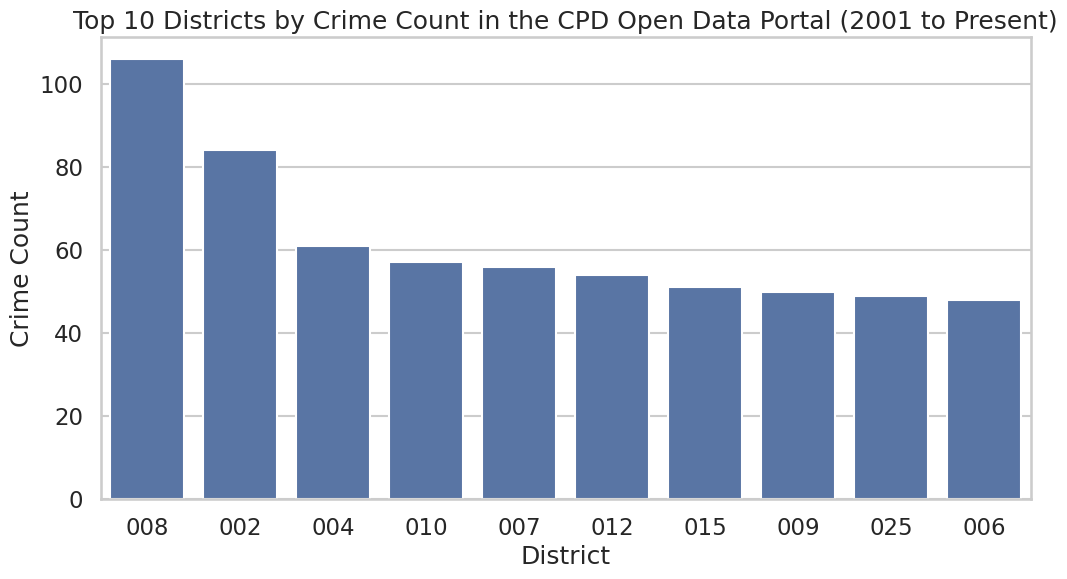

In [102]:
# keep only top X rows for readability sake
top_n = 10 # Variable as a knob for SCALABILITY
df_top = df.head(top_n)

########## STYLISTICS ##########
# settings for figure size
plt.figure(figsize=(12,6))

# Themes
sns.set_theme(style="whitegrid",
              context="talk"
              )

# CREATE BARPLOT WITH SEABORN
sns.barplot(
    data=df_top,
    x="district",
    y="count_per_district"
)

# Set titles and descriptors (CUSTOMIZING)
plt.title(f"Top {top_n} Districts by Crime Count in the CPD Open Data Portal (2001 to Present)")
plt.xlabel("District")
plt.ylabel("Crime Count")

# Create Chart Using Altair